# Project: Investigating the TMDB movie dataset by Tobiloba Babajide

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, I investigated the TMDB movie dataset to identify trends and patterns in the data.
The dataset contains specific data about over 10,000 movies and in this investigation, I will identify the relationships between the parameters.
>
> In this investigation, I will identify the relationships between genre of the movie, the allocated budget, the revenue generated, and the runtime of the movie. The following questions will be answered:
> 1. Does the budget of a movie correlate with how well it does based on its average rating?
> 2. Does budget correlate with revenue?
> 3. Do longer movies have higher ratings?
> 4. Do longer movies have higher revenue?
> 5. Do higher earning movies have higher ratings?
>
> Some things to note about the dataset:
> 1. The "popularity" scores are between 0 and 40.
> 2. The values in the "vote" column are between 0 and 10.
> 3. The "runtime" values are in minutes.
> 4. The budgets and revenues are given in dollars.
> 5. The budget_adj and revenue_adj columns represent the budget and revenue adjusted for inflation.
>
> The data was downloaded from this link:
https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000
> Let us begin!

First, I imported the necessary packages:

In [1]:
# import the pondas, numpy, and matplotlib packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Include the "matplotlib inline" statement so that visualizations are plotted inline
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> I loaded in the data from my local computer, checked for cleanliness, and then trimmed and cleaned it further for analysis.

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\USER\Desktop\Data Analysis Career\ALX Nanodegree Program\Project\tmdb-movies.csv')

In [3]:
# Print out a few lines at the top.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Print out a few lines at the bottom.
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Inspect the data
print(df.shape)
df.info()

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

There are 10866 rows of movie data and there are 21 columns describing them.

Now, look at the column names:

In [6]:
# Column names
print(df.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning

I deleted the columns that will not be needed for the analysis:

In [7]:
# Delete unnecessary columns
df.drop(columns=['imdb_id','cast','homepage','director','tagline','keywords',
                 'overview','production_companies','release_date'], inplace=True, axis=1)

In [8]:
# Check the data again:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
print(df.shape)
df.info()

(10866, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1018.8+ KB


The columns are down to 12.
However, there is a column with 23 missing values, so I had to drop the rows that contain them:

In [10]:
# drop rows with null values
df.dropna(axis=0, inplace=True)

In [11]:
print(df.shape)
df.info()

(10843, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   budget          10843 non-null  int64  
 3   revenue         10843 non-null  int64  
 4   original_title  10843 non-null  object 
 5   runtime         10843 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10843 non-null  int64  
 8   vote_average    10843 non-null  float64
 9   release_year    10843 non-null  int64  
 10  budget_adj      10843 non-null  float64
 11  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


Now, there are 10843 rows.

I checked if there are duplicate rows in the data:

In [12]:
df.nunique()

id                10842
popularity        10791
budget              557
revenue            4702
original_title    10548
runtime             246
genres             2039
vote_count         1289
vote_average         72
release_year         56
budget_adj         2613
revenue_adj        4840
dtype: int64

Notice that there are duplicate original titles in 295 rows. I deleted these duplicate rows:

In [13]:
df = df.drop_duplicates(subset='original_title', keep='first')

Check again:

In [14]:
df.nunique()

id                10548
popularity        10500
budget              551
revenue            4590
original_title    10548
runtime             242
genres             1999
vote_count         1277
vote_average         72
release_year         56
budget_adj         2554
revenue_adj        4718
dtype: int64

I needed to delete rows in which the budget and revenue values are 0 because this indicates that there are missing information about these movies and they will tamper with our analysis:

In [15]:
df.drop(df[df['budget'] == 0].index, inplace = True)
df.drop(df[df['revenue'] == 0].index, inplace = True)

I proceeded to describe the data using summary statistics:

In [16]:
# Summarize the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03
mean,40557.264643,1.194688,3.752862e+07,1.082386e+08,109.177316,530.734824,6.164004,2001.538339,4.436703e+07,1.363931e+08
std,67866.292487,1.486161,4.244601e+07,1.770478e+08,19.879316,885.741290,0.794936,11.061930,4.498007e+07,2.158969e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6430.000000,0.463133,1.000000e+07,1.358668e+07,95.000000,71.000000,5.675000,1996.000000,1.319180e+07,1.830994e+07
50%,11370.500000,0.798343,2.400000e+07,4.483448e+07,105.000000,205.000000,6.200000,2004.000000,3.014881e+07,6.092554e+07
75%,39713.500000,1.374400,5.000000e+07,1.256217e+08,119.000000,581.250000,6.700000,2010.000000,6.061307e+07,1.619430e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


For the purpose of this analysis, I only use the first genre to represent the genres of the movies.

In [17]:
df['genres'] = df['genres'].str.split('|').str[0]
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


I had to convert the budget, revenue, adjusted budget, and adjusted revenue columns to integers to make the process smoother:

In [18]:
df = df.astype({'budget':'int','revenue':'int','budget_adj':'int',
                'revenue_adj':'int'})
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,137999939,348161292


<a id='eda'></a>
## Exploratory Data Analysis

>Here, I computed statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section.

I identified some key information about the dataset.


### Most popular movies in each year

First, I took a look at the most popular movies in each year:

In [19]:
# group by release_year and find the movie with the highest popularity in each year:
high_rate = df.loc[df.groupby(['release_year'])['popularity'].idxmax()]
print(high_rate[['release_year', 'original_title']])

       release_year                                     original_title
10142          1960                              The Magnificent Seven
10110          1961                     One Hundred and One Dalmatians
9849           1962                                             Dr. No
10438          1963                              From Russia With Love
9881           1964                                         Goldfinger
10689          1965                                        Thunderball
10822          1966                    Who's Afraid of Virginia Woolf?
10399          1967                                       The Graduate
9719           1968                              2001: A Space Odyssey
10724          1969                    On Her Majesty's Secret Service
10648          1970                                     The Aristocats
9923           1971                                 A Clockwork Orange
7269           1972                                      The Godfather
10594 

### Highest earning movie for each year

Next, I took a look at the highest earning movie for each year:

In [20]:
# group by release_year and find the movie with the maximum revenue for each year
high_earn = df.loc[df.groupby(['release_year'])['revenue_adj'].idxmax()]
print(high_earn[['release_year', 'original_title', 'genres']])

       release_year                                 original_title  \
10144          1960                                  The Apartment   
10110          1961                 One Hundred and One Dalmatians   
9850           1962                             Lawrence of Arabia   
10438          1963                          From Russia With Love   
9881           1964                                     Goldfinger   
10690          1965                             The Sound of Music   
10822          1966                Who's Afraid of Virginia Woolf?   
10401          1967                            You Only Live Twice   
9719           1968                          2001: A Space Odyssey   
10725          1969             Butch Cassidy and the Sundance Kid   
10654          1970                                     Love Story   
9925           1971                           Diamonds Are Forever   
7269           1972                                  The Godfather   
10595          1973 

### Highest rated movies in each genre

Then, I took a look at the highest rated movies in each genre:

In [21]:
# group by genre and find the movie with the maximum vote_average in each genre
rate_genre = df.loc[df.groupby(['genres'])['vote_average'].idxmax()]
print(rate_genre[['genres', 'original_title']])

               genres                  original_title
630            Action         Guardians of the Galaxy
629         Adventure                    Interstellar
1390        Animation                              Up
4179           Comedy                    Forrest Gump
5428            Crime         The Wolf of Wall Street
7948      Documentary               Stop Making Sense
4178            Drama        The Shawshank Redemption
4180           Family                   The Lion King
2414          Fantasy                  The Green Mile
636           History              The Imitation Game
7825           Horror                           Alien
7312            Music              The Blues Brothers
639           Mystery                       Gone Girl
694           Romance          The Fault in Our Stars
1438  Science Fiction                      Mr. Nobody
8615         TV Movie                      Doctor Who
4177         Thriller                    Pulp Fiction
2905              War  The B

### Highest earning movies in each genre

Also, I took a look at the highest earning movies in each genre:

In [22]:
# group by genre and find the maximum revenue for each genre
earn_genre = df.loc[df.groupby(['genres'])['revenue_adj'].idxmax()]
print(earn_genre[['genres', 'original_title']])

                genres                         original_title
3               Action           Star Wars: The Force Awakens
10110        Adventure         One Hundred and One Dalmatians
1930         Animation                            Toy Story 3
4179            Comedy                           Forrest Gump
8094             Crime                                The Net
7049       Documentary                        Fahrenheit 9/11
7269             Drama                          The Godfather
4180            Family                          The Lion King
3916           Fantasy                             Spider-Man
10725          History     Butch Cassidy and the Sundance Kid
9806            Horror                                   Jaws
10755            Music                                 Grease
2415           Mystery                        The Sixth Sense
9983           Romance                           Pretty Woman
8889   Science Fiction             E.T. the Extra-Terrestrial
8615    

### Genres that earned the most money

To find the genres that earned the most money, group by genre and find the sum of its revenue: 

In [23]:
# group by genres and find the sum of revenue
sums = df.groupby('genres').sum()

In [24]:
# list of genres
gen = df['genres'].unique()

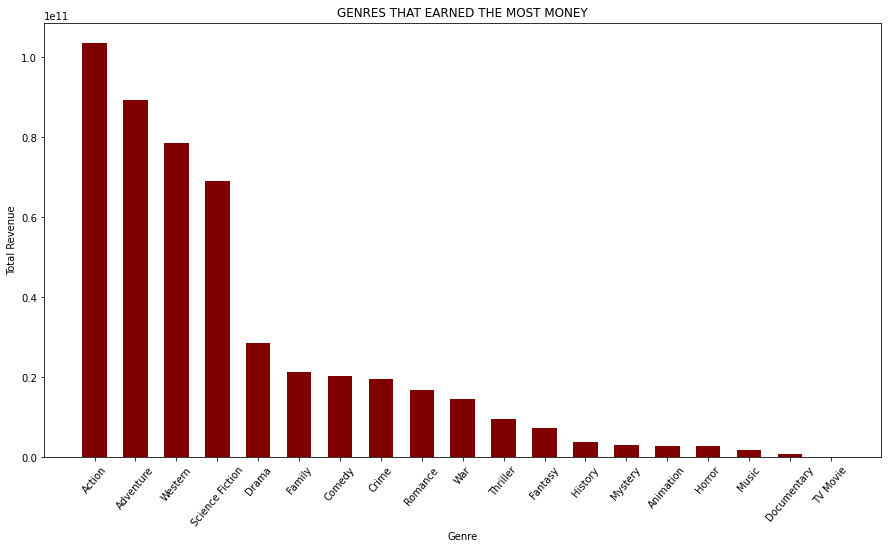

In [25]:
#plot the bar chart
rev = list(sums['revenue_adj'].sort_values(ascending=False))

# specify the qualities of the bar chart
plt.figure(figsize=(15, 8))
plt.bar(gen, rev, color ='maroon', width = 0.6, align = 'center')
plt.xticks(rotation = 50, color='black')
plt.title('GENRES THAT EARNED THE MOST MONEY', color='black')
plt.xlabel('Genre', color='black')
plt.ylabel('Total Revenue', color='black')
plt.show()

**Action** movies earn the most money while **TV Movies** earn the least.

### Highest Rated Movies
Then, I found the top ten highest rated movies of all time:

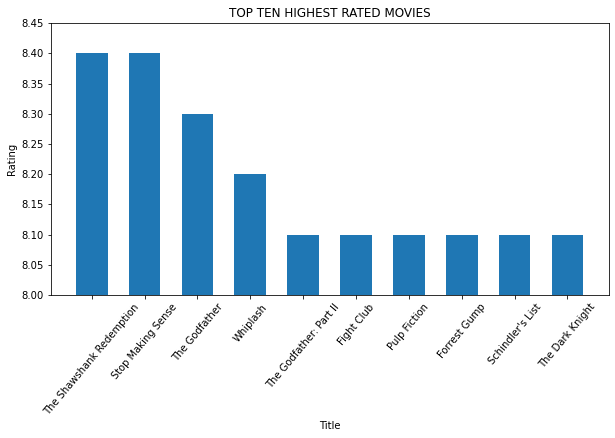

In [26]:
# find the top 10 highest vote_average:
df_1 = df.sort_values('vote_average',ascending=False)
top_ten_rated = df_1[:10]

# list of titles of top ten rated movies
rated_title = list(top_ten_rated['original_title'])

#list of ratings for top ten rated movies
rated_rating = list(top_ten_rated['vote_average'])

# plot a bar chart
plt.figure(figsize=(10, 5))
plt.bar(rated_title, rated_rating, width = 0.6, align = 'center')
plt.xticks(rotation = 50, color='black')
plt.ylim(bottom=8, top=8.45)
plt.title('TOP TEN HIGHEST RATED MOVIES', color='black')
plt.xlabel('Title', color='black')
plt.ylabel('Rating', color='black')
plt.show()

How fascinating! **Shawshank Redemption** is the highest rated movie.

### Highest earning movies
Then, I found the top ten highest earning movies:

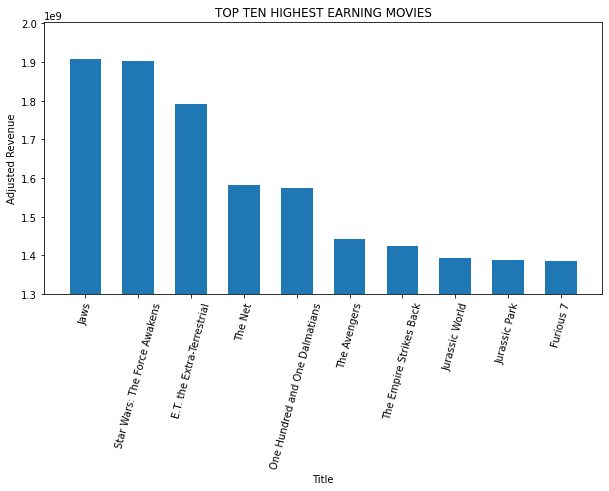

In [27]:
# find the top 10 highest revenue_adj:
df_2 = df.sort_values('revenue_adj',ascending=False)
top_ten_earning = df_2[:10]

# list of titles of top ten highest earning movies
earn_title = list(top_ten_earning['original_title'])

#list of ratings for top ten highest earning movies
earn_rating = list(top_ten_earning['revenue_adj'])

# plot a bar chart
plt.figure(figsize=(10, 5))
plt.bar(earn_title, earn_rating, width = 0.6, align = 'center')
plt.xticks(rotation = 75, color='black')
plt.ylim(bottom=1.3e9)
plt.title('TOP TEN HIGHEST EARNING MOVIES', color='black')
plt.xlabel('Title', color='black')
plt.ylabel('Adjusted Revenue', color='black')
plt.show()

**Jaws** is the highest earning movie with over **1.9 billion dollars** in revenue.

#### Important note:
> For this portion of the analysis, I did not only make use of scatterplots but I added the lines of best fit to determine correlation between variables

## Question 1
### Does the budget of a movie correlate with how well it does based on its average rating?

To check this, I plotted a scatter plot of adjusted budget versus the average rating:

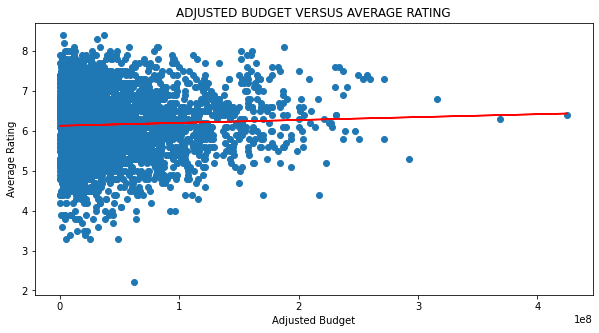

In [28]:
# line of best fit
x1 = df['budget_adj']
y1 = df['vote_average']
a, b = np.polyfit(x1, y1, 1)

#add points and plot
plt.figure(figsize=(10, 5))
plt.scatter(x1, y1)

#add line of best fit to plot
plt.plot(x1, a*x1+b, color = 'red')

# scatterplot qualities
plt.title('ADJUSTED BUDGET VERSUS AVERAGE RATING', color='black')
plt.xlabel('Adjusted Budget', color='black')
plt.ylabel('Average Rating', color='black')
plt.show()

From this plot, there isn't exactly any correlation between the budget of a movie and how well it is rated.

## Question 2
### Does the budget of a movie correlate with its revenue?

To check this, I plotted a scatter plot of adjusted budget versus adjusted revenue:

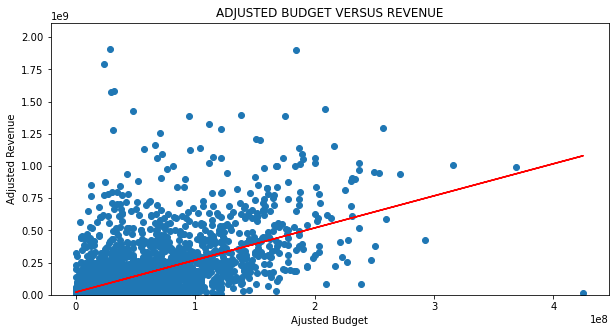

In [29]:
#line of best fit
y2 = df['revenue_adj']
a, b = np.polyfit(x1, y2, 1)

#add points and plot
plt.figure(figsize=(10, 5))
plt.scatter(x1, y2)

#add line of best fit to plot
plt.plot(x1, a*x1+b, color = 'red')

# scatterplot qualities
plt.title('ADJUSTED BUDGET VERSUS REVENUE', color='black')
plt.ylim(bottom=0)
plt.xlabel('Ajusted Budget', color='black')
plt.ylabel('Adjusted Revenue', color='black')
plt.show()

From this plot, there is a positive correlation between the budget of a movie and its revenue. In other words, **the higher the budget of a movie, the more likely it is to generate higher revenue.**

## Question 3

### Do longer movies have higher ratings?

To check this, I plotted a scatter plot of runtime versus average rating:

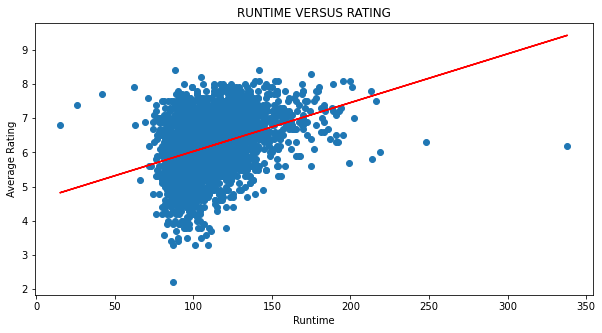

In [30]:
# line of best fit
x2 = df['runtime']
a, b = np.polyfit(x2, y1, 1)

#add points and plot
plt.figure(figsize=(10, 5))
plt.scatter(x2, y1)

#add line of best fit to plot
plt.plot(x2, a*x2+b, color = 'red')

# scatterplot qualities
plt.title('RUNTIME VERSUS RATING', color='black')
plt.xlabel('Runtime', color='black')
plt.ylabel('Average Rating', color='black')
plt.show()

From this plot, there is a positive correlation between the runtime of a movie and its average rating. In other words, **the longer the movie, the more likely it is to have a higher average rating.**

## Question 4

### Do longer movies earn more money?

To check this, I plotted a scatter plot of runtime versus adjusted revenue:

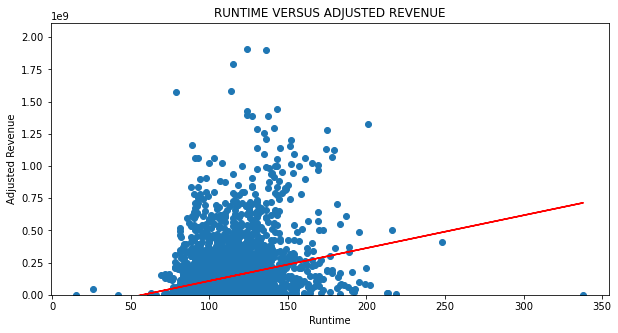

In [31]:
# line of best fit
a, b = np.polyfit(x2, y2, 1)

#add points and plot
plt.figure(figsize=(10, 5))
plt.scatter(x2, y2)

#add line of best fit to plot
plt.plot(x2, a*x2+b, color = 'red')

# scatterplot qualities
plt.ylim(bottom=0)
plt.title('RUNTIME VERSUS ADJUSTED REVENUE', color='black')
plt.xlabel('Runtime', color='black')
plt.ylabel('Adjusted Revenue', color='black')
plt.show()

From this plot, there is a positive correlation between the runtime of a movie and the revenue it generates. In other words, **the longer the movie, the more likely it is generate more revenue.**

## Question 5

### Do higher earning movies have higher ratings?

To check this, I plotted a scatter plot of adjusted revenue versus average rating:

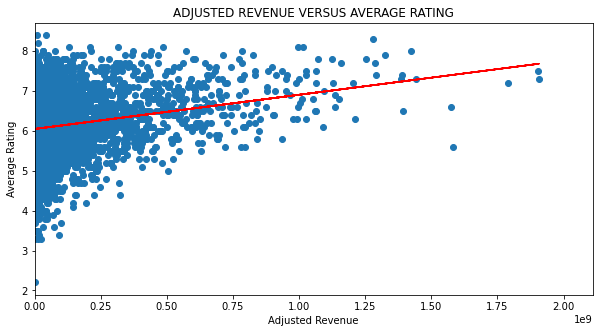

In [32]:
#line of best fit
a, b = np.polyfit(y2, y1, 1)

#add points and plot
plt.figure(figsize=(10, 5))
plt.scatter(y2, y1)

#add line of best fit to plot
plt.plot(y2, a*y2+b, color = 'red')

# scatterplot qualities
plt.title('ADJUSTED REVENUE VERSUS AVERAGE RATING', color='black')
plt.xlim(left=0)
plt.xlabel('Adjusted Revenue', color='black')
plt.ylabel('Average Rating', color='black')
plt.show()

From this plot, there is a positive correlation between the revenue generated by a movie and the average rating it receives. In other words, **the higher the revenue generated by a movie, the more likely it is receive a higher rating.**

<a id='conclusions'></a>
## Conclusions
From the analyses of this dataset, the following conclusions were made:
1. There is no correlation between the **budget** of a movie and how well it is rated.
2. The higher the **budget** of a movie, the more likely it is to generate higher **revenue**.
3. The longer the movie, the more likely it is to have a higher average **rating**.
4. The longer the movie, the more likely it is generate more **revenue**.
5. The higher the **revenue** generated by a movie, the more likely it is receive a higher **rating**.

> ### Limitations
> There were a lot of rows that contained missing values in columns necessary for the analysis such as the adjusted budget and adjusted revenue and some duplicate rows, so they had to be deleted, which significantly reduced the total number of rows used for the analysis.



This was an interesting dataset to investigate, as one who is new to life as a data analyst, it was quite tasking to investigate but it was worth it in the end.

